# Hive Metrics

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
import sys
#!{sys.executable} -m pip install ?
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture
import datetime
import os
import re
%matplotlib inline

Getting Poughkeepsie, NY local hive metrics from 
https://map.beecounted.org/citizen_science/embedded_map
using curl for each hive

In [2]:
#!mkdir -p data

In [3]:
# Get weight data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/p2qf/1304612040/1620231240/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/OAco/1304619496/1620238696/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/OAco/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-OAco.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/58ho/1304619714/1620238914/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/zvaP/1304619917/1620239117/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_weight_graph/1cdn/1304619909/1620239109/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_weight_graph-1cdn.html

In [4]:
# Get temp data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/p2qf/1304612040/1620231240/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/sPxZ/1304619093/1620238293/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/sPxZ/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-sPxZ.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/oJfp/1304619285/1620238485/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/oJfp/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-oJfp.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/OAco/1304619496/1620238696/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/OAco/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-OAco.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/FoYq/1304619591/1620238791/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/FoYq/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-FoYq.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/58ho/1304619714/1620238914/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/zvaP/1304619917/1620239117/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_temperature_graph/1cdn/1304619909/1620239109/imperial/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_temperature_graph-1cdn.html

In [5]:
# Get humidity data
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/p2qf/1304612040/1620231240/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/p2qf/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-p2qf.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/sPxZ/1304619093/1620238293/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/sPxZ/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-sPxZ.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/oJfp/1304619285/1620238485/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/oJfp/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-oJfp.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/FoYq/1304619591/1620238791/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/FoYq/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-FoYq.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/58ho/1304619714/1620238914/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/58ho/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-58ho.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/zvaP/1304619917/1620239117/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/zvaP/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-zvaP.html
#!curl 'https://map.beecounted.org/api_internal/hive_summary_humidity_graph/1cdn/1304619909/1620239109/en' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'X-Requested-With: XMLHttpRequest' -H 'Connection: keep-alive' -H 'Referer: https://map.beecounted.org/hive/summary/1cdn/last10years'  -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' > data/hive_summary_humidity_graph-1cdn.html

In [6]:
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +datetime.timedelta(hours=t.minute//30))

In [7]:
directory = r'data'
hive_dfs = {}

for filename in os.listdir(directory):
    if filename[:4] == "hive":
        fullname = os.path.join(directory, filename)
        hive_id = filename.split("-")[1].replace(".html","")
        metric = filename.replace("hive_summary_","").replace(f"_graph-{hive_id}.html","")
        print(fullname,hive_id, metric)
        if hive_id not in hive_dfs:
            hive_dfs[hive_id] = {}
        with open(fullname, "r") as f:
            content = f.read()
        m = re.search(r"\s*data: (\[.*?,\]),", content)
        if m is not None:
            result = json.loads(m.group(1).replace("],]","]]"))
            result = [[hour_rounder(datetime.datetime.utcfromtimestamp(float(r[0])/1000.)), r[1]]for r in result]
            df = pd.DataFrame(result, columns=['dt',metric])
            df = df.set_index('dt')
            hive_dfs[hive_id][metric] = df

data\hive_summary_humidity_graph-1cdn.html 1cdn humidity
data\hive_summary_humidity_graph-58ho.html 58ho humidity
data\hive_summary_humidity_graph-FoYq.html FoYq humidity
data\hive_summary_humidity_graph-oJfp.html oJfp humidity
data\hive_summary_humidity_graph-p2qf.html p2qf humidity
data\hive_summary_humidity_graph-sPxZ.html sPxZ humidity
data\hive_summary_humidity_graph-zvaP.html zvaP humidity
data\hive_summary_temperature_graph-1cdn.html 1cdn temperature
data\hive_summary_temperature_graph-58ho.html 58ho temperature
data\hive_summary_temperature_graph-FoYq.html FoYq temperature
data\hive_summary_temperature_graph-OAco.html OAco temperature
data\hive_summary_temperature_graph-oJfp.html oJfp temperature
data\hive_summary_temperature_graph-p2qf.html p2qf temperature
data\hive_summary_temperature_graph-sPxZ.html sPxZ temperature
data\hive_summary_temperature_graph-zvaP.html zvaP temperature
data\hive_summary_weight_graph-58ho.html 58ho weight
data\hive_summary_weight_graph-OAco.html OAc

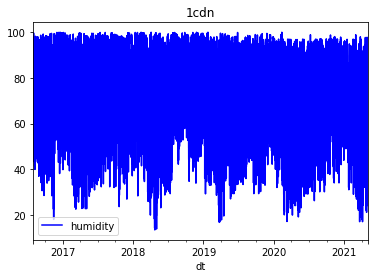

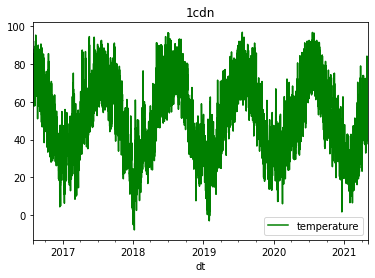

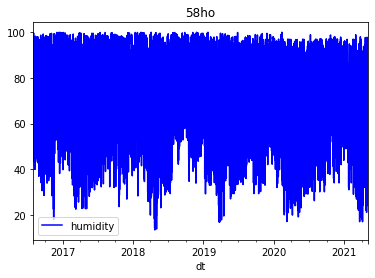

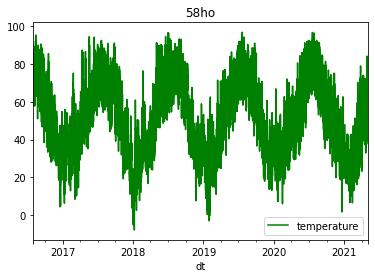

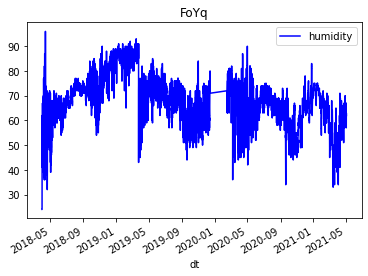

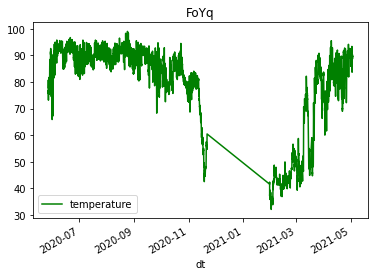

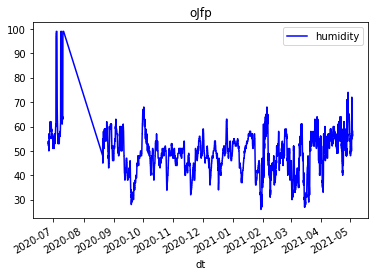

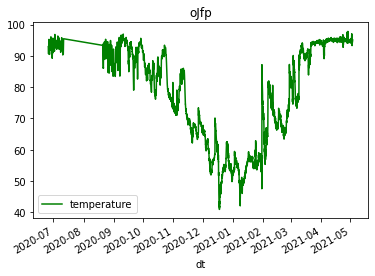

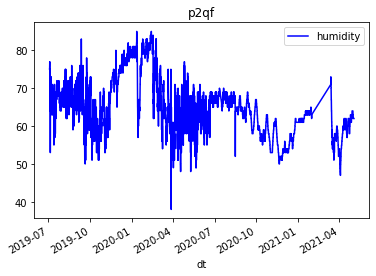

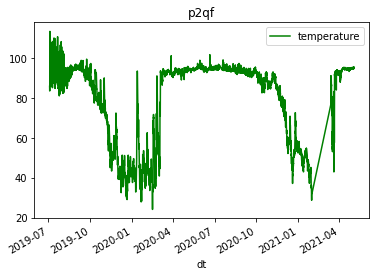

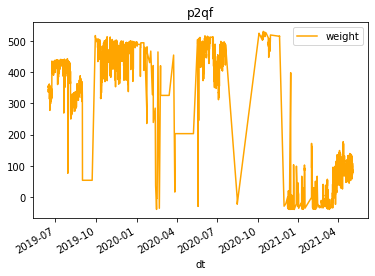

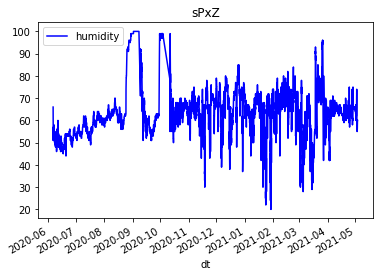

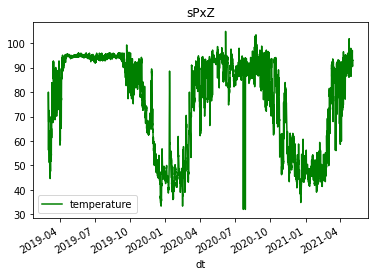

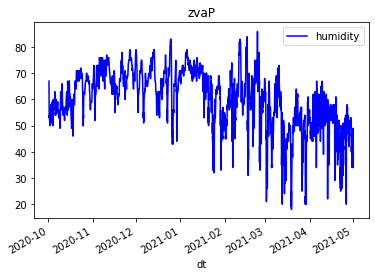

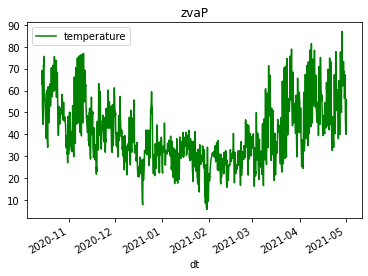

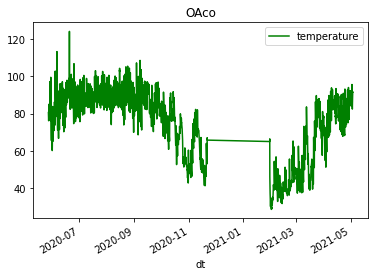

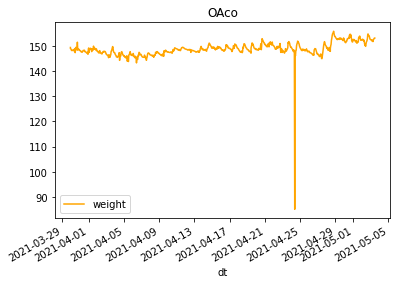

In [8]:
for hive in hive_dfs:
    for k in hive_dfs[hive].keys():
        if k == "temperature":
            color = "green"
        elif k == "humidity":
            color = "blue"
        elif k == "weight":
            color = "orange"
        hive_dfs[hive][k].plot(title=hive, color=color);

In [9]:
#Merge dfs for each hive
for hive in hive_dfs:
    keys = list(hive_dfs[hive].keys())
    #print(keys[0])
    #3-key merge
    if len(hive_dfs[hive].keys()) == 3:
        tmpdf1 = hive_dfs[hive][keys[0]].merge(hive_dfs[hive][keys[1]], how='left', on='dt')
        hive_dfs[hive] = tmpdf1.merge(hive_dfs[hive][keys[2]], how='left', on='dt')
        print(hive)
        print(hive_dfs[hive], "\n")
    
    #2-key merge
    elif len(hive_dfs[hive].keys()) == 2:
        hive_dfs[hive] = hive_dfs[hive][keys[0]].merge(hive_dfs[hive][keys[1]], how='left', on='dt')
        print(hive)
        print(hive_dfs[hive], "\n")


1cdn
                     humidity  temperature
dt                                        
2016-07-30 18:00:00      93.5         72.0
2016-07-30 19:00:00      93.3         70.7
2016-07-30 20:00:00      95.1         69.8
2016-07-30 21:00:00      96.1         70.1
2016-07-30 22:00:00      96.8         69.3
...                       ...          ...
2021-05-03 06:00:00      91.1         51.9
2021-05-03 07:00:00      86.1         54.4
2021-05-03 08:00:00      78.0         57.6
2021-05-03 09:00:00      69.1         60.5
2021-05-03 10:00:00      68.0         61.5

[41705 rows x 2 columns] 

58ho
                     humidity  temperature
dt                                        
2016-07-30 18:00:00      93.5         72.0
2016-07-30 19:00:00      93.3         70.7
2016-07-30 20:00:00      95.1         69.8
2016-07-30 21:00:00      96.1         70.1
2016-07-30 22:00:00      96.8         69.3
...                       ...          ...
2021-05-03 06:00:00      91.1         51.9
2021-05-03 07:00

In [10]:
#Remove outliers
for hive in hive_dfs:
    #Check for and remove outliers in each column, as well as in the same index in the ss_hive_dfs dataframes
    for col in hive_dfs[hive].keys():
        print(hive)
        print(col)
        if col == "humidity":
            #Just checking for humidity values <0 or >100
            print(hive_dfs[hive].loc[(hive_dfs[hive][col]<0) | (hive_dfs[hive][col]> 100)], "\n")
            hive_dfs[hive].drop(hive_dfs[hive].loc[(hive_dfs[hive][col]<0) | (hive_dfs[hive][col]> 100)].index, inplace = True)
        elif col == "temperature":
            #Just making sure temp is in a good range, lets say >-10 and <110, since in the Hudson Valley, NY area it
            #should be in that range most of the time, and this gets rid of the most ridiculous values
            print(hive_dfs[hive].loc[(hive_dfs[hive][col]<-10) | (hive_dfs[hive][col]> 110)], "\n")
            hive_dfs[hive].drop(hive_dfs[hive].loc[(hive_dfs[hive][col]<-10) | (hive_dfs[hive][col]> 110)].index, inplace = True)
        else:
            #IQR outlier detection
            q1 = hive_dfs[hive][col].quantile(0.25)
            q3 = hive_dfs[hive][col].quantile(0.75)
            iqr = q3 - q1
            #print(q1)
            #print(q3)
            #print(iqr)

            print(hive_dfs[hive].loc[(hive_dfs[hive][col]<= (q1 - (1.5 * iqr))) | (hive_dfs[hive][col]>= (q3 + (1.5 * iqr)))], "\n")
            hive_dfs[hive].drop(hive_dfs[hive].loc[(hive_dfs[hive][col]<= (q1 - (1.5 * iqr))) | (hive_dfs[hive][col]>= (q3 + (1.5 * iqr)))].index, inplace = True)
            


1cdn
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

1cdn
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

58ho
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

58ho
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

FoYq
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

FoYq
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

oJfp
humidity
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

oJfp
temperature
Empty DataFrame
Columns: [humidity, temperature]
Index: [] 

p2qf
humidity
Empty DataFrame
Columns: [humidity, temperature, weight]
Index: [] 

p2qf
temperature
                     humidity  temperature  weight
dt                                                
2019-07-04 13:00:00        66       112.76     NaN
2019-07-04 14:00:00        64       113.47  418.94
2019-07-13 13:00:00        55       110.14  434.06
2019-07-21 14:00:00        68    

In [11]:
#Drop duplicate timestamps, if any
print("Dropping duplicates")
for hive in hive_dfs:
    print("Hive: " + hive)
    
    #Dropping duplicates
    #hive_dfs[hive].drop_duplicates(keep = 'first', inplace = True)
    hive_dfs[hive] = hive_dfs[hive][~hive_dfs[hive].index.duplicated(keep='first')]


Dropping duplicates
Hive: 1cdn
Hive: 58ho
Hive: FoYq
Hive: oJfp
Hive: p2qf
Hive: sPxZ
Hive: zvaP
Hive: OAco


In [12]:
#Pandas interpolate will only fil NaN values, but there are simply missing timestamp indexes. Fill the area inbetween the first and
#last legitimate timestamp with NaN rows if they do not exist
print("Filling missing timestamps with np.NaNs")
for hive in hive_dfs:
    print("Hive: " + hive)

    #Iterate through the total time frame hourly
    startIndex = hive_dfs[hive].index[0]
    endIndex = hive_dfs[hive].index[-1]
    totalHours = pd.Timedelta(endIndex - startIndex).total_seconds() / 3600

    fillIter = 0
    #While we haven't gotten to the end...
    while fillIter <= totalHours:
        delta = pd.Timedelta(seconds = fillIter * 3600)
        time = startIndex + delta

        #If the current datetime is not in the dataframe, add it with null values
        if time not in hive_dfs[hive].index:
            #print(str(time) + " does not exist")
            if len(hive_dfs[hive].keys()) == 2:
                hive_dfs[hive].loc[time] = [np.nan, np.nan]
            else:
                hive_dfs[hive].loc[time] = [np.nan, np.nan, np.nan]
        #else:
        #    print(str(time) + " exists")

        fillIter += 1
    
    #All the new rows got added to the end of the dataframe, sort it so that its all in order
    hive_dfs[hive].sort_index(inplace = True)
    print(hive_dfs[hive], "\n")


Filling missing timestamps with np.NaNs
Hive: 1cdn
                     humidity  temperature
dt                                        
2016-07-30 18:00:00      93.5         72.0
2016-07-30 19:00:00      93.3         70.7
2016-07-30 20:00:00      95.1         69.8
2016-07-30 21:00:00      96.1         70.1
2016-07-30 22:00:00      96.8         69.3
...                       ...          ...
2021-05-03 06:00:00      91.1         51.9
2021-05-03 07:00:00      86.1         54.4
2021-05-03 08:00:00      78.0         57.6
2021-05-03 09:00:00      69.1         60.5
2021-05-03 10:00:00      68.0         61.5

[41705 rows x 2 columns] 

Hive: 58ho
                     humidity  temperature
dt                                        
2016-07-30 18:00:00      93.5         72.0
2016-07-30 19:00:00      93.3         70.7
2016-07-30 20:00:00      95.1         69.8
2016-07-30 21:00:00      96.1         70.1
2016-07-30 22:00:00      96.8         69.3
...                       ...          ...
2021-05

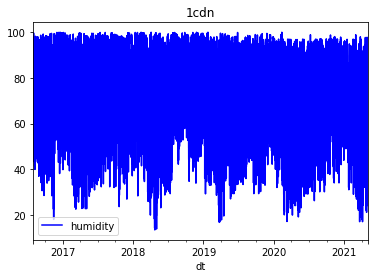

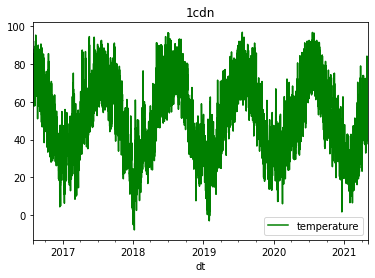

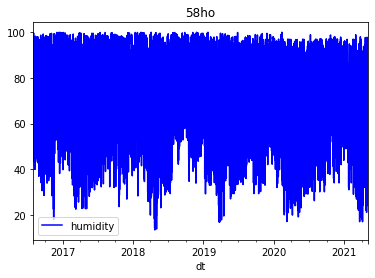

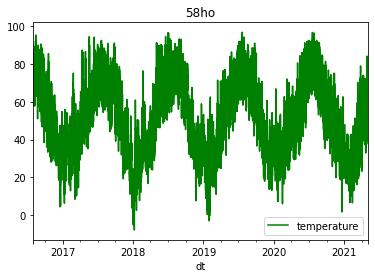

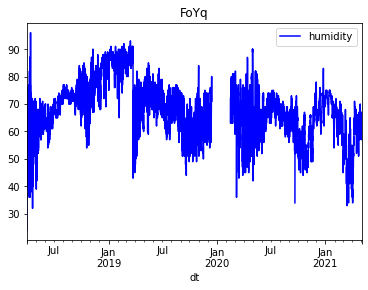

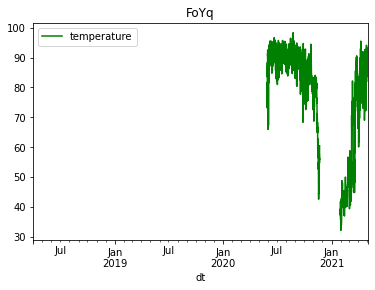

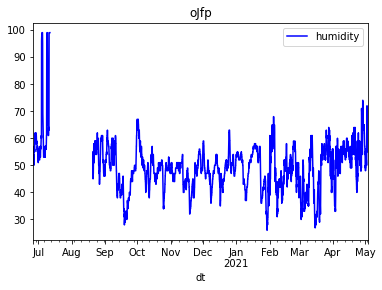

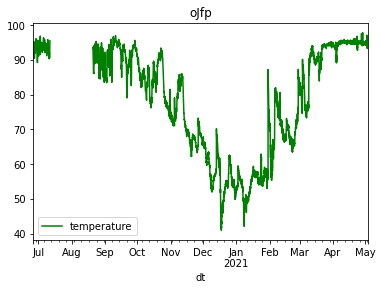

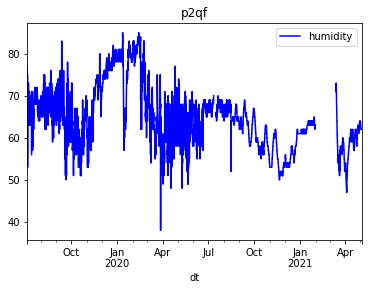

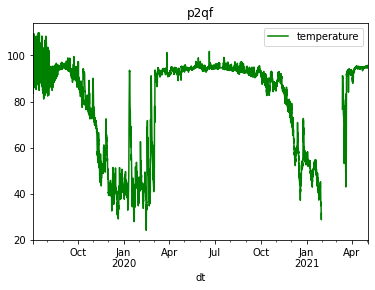

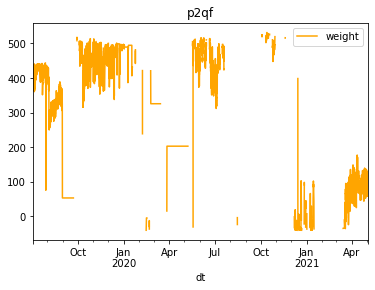

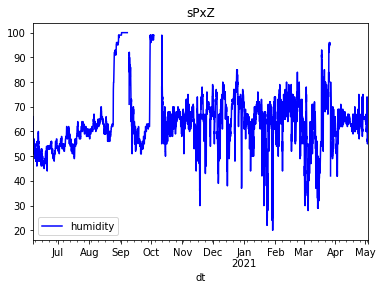

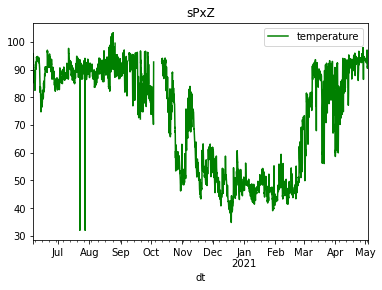

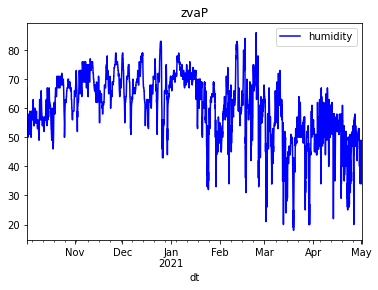

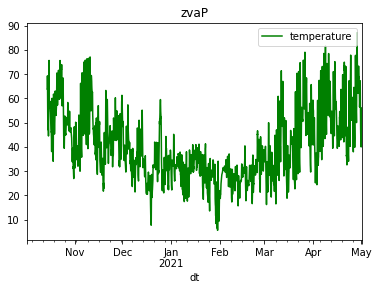

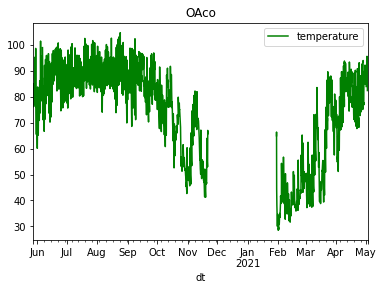

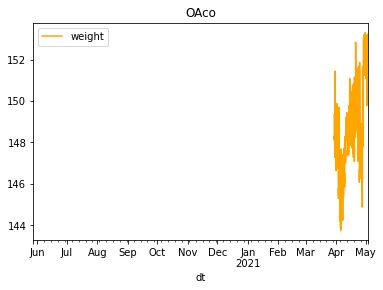

In [13]:
#Just using the same print as before to compare
for hive in hive_dfs:
    for k in hive_dfs[hive].keys():
        if k == "temperature":
            color = "green"
        elif k == "humidity":
            color = "blue"
        elif k == "weight":
            color = "orange"
        hive_dfs[hive].plot(y = k, title=hive, color=color);

In [14]:
#Lets see some info about each hive now that things are a bit cleaned up
for hive in hive_dfs:
    print(hive)
    
    print("Info:")
    print(hive_dfs[hive].info(), "\n")
    
    print(hive_dfs[hive].describe(), "\n")
    
    print("Correlation:")
    print(hive_dfs[hive].corr(), "\n")

1cdn
Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41705 entries, 2016-07-30 18:00:00 to 2021-05-03 10:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   humidity     41705 non-null  float64
 1   temperature  41705 non-null  float64
dtypes: float64(2)
memory usage: 1.7 MB
None 

           humidity   temperature
count  41705.000000  41705.000000
mean      72.503587     51.112775
std       18.920021     19.002043
min       13.400000     -7.700000
25%       58.600000     35.600000
50%       75.200000     50.600000
75%       89.400000     67.000000
max      100.000000     96.700000 

Correlation:
             humidity  temperature
humidity     1.000000    -0.079219
temperature -0.079219     1.000000 

58ho
Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41705 entries, 2016-07-30 18:00:00 to 2021-05-03 10:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  --

<AxesSubplot:xlabel='dt'>

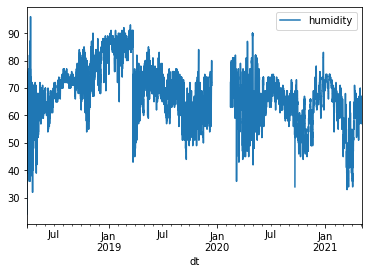

In [15]:
#Testing handling missing data using pandas interpolate


#The gap in OAco is too big to interpolate by itself
#tmpdf = hive_dfs["OAco"].loc[(hive_dfs["OAco"].index >= "2020-11-01 00:00:00") & (hive_dfs["OAco"].index <= "2021-02-01 00:00:00")]

tmpdf = hive_dfs["FoYq"]
tmpdf.plot(y="humidity")

humidity        1569
temperature    20623
dtype: int64


<AxesSubplot:xlabel='dt'>

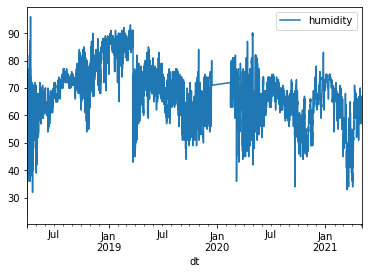

In [16]:
print(tmpdf.isnull().sum())

#Interpolate and plot it again
tmpdf = tmpdf.interpolate()
tmpdf.plot(y="humidity")

#Old OAco code
#tmpdf.loc[(hive_dfs["OAco"].index >= "2020-12-01 00:00:00") & (hive_dfs["OAco"].index <= "2021-02-01 00:00:00")].head(50)
#tmpdf = tmpdf.loc[(tmpdf.index >= "2020-11-01 00:00:00") & (tmpdf.index <= "2021-02-01 00:00:00")]
#tmpdf.plot(y="temperature")

In [17]:
#A few of these hives have data from a number of years, lets get them broken into year - day of year so we can overlay them
for hive in hive_dfs:
    print("Breaking timestamp of hive: " + hive)
    
    #Get the year
    hive_dfs[hive]['year'] = hive_dfs[hive].apply(lambda currRow: currRow.name.year, axis = 1)
    #And the day of the year
    hive_dfs[hive]['dayofyear'] = hive_dfs[hive].apply(lambda currRow: currRow.name.dayofyear, axis = 1)
    
    #Print to make sure it looks ok
    #print(hive_dfs[hive])

Breaking timestamp of hive: 1cdn
Breaking timestamp of hive: 58ho
Breaking timestamp of hive: FoYq
Breaking timestamp of hive: oJfp
Breaking timestamp of hive: p2qf
Breaking timestamp of hive: sPxZ
Breaking timestamp of hive: zvaP
Breaking timestamp of hive: OAco


year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: temperature, dtype: object

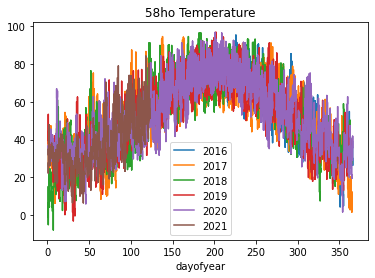

In [18]:
#Lets see our temperature by year
#For some reason, using loops to try to print these all out will graph them all on a single chart, making it illegible, just have to
#pick and choose a few hives and metrics to show

#58ho temperature
tmp58ho = hive_dfs["58ho"].set_index('dayofyear')
tmp58ho.groupby('year')['temperature'].plot(legend = True, title = "58ho Temperature")

year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: humidity, dtype: object

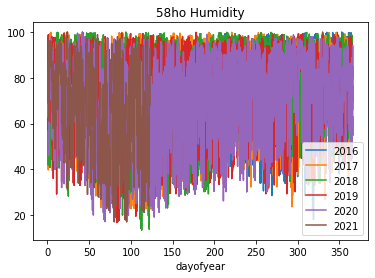

In [19]:
#and humidity
tmp58ho.groupby('year')['humidity'].plot(legend = True, title = "58ho Humidity")

year
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: temperature, dtype: object

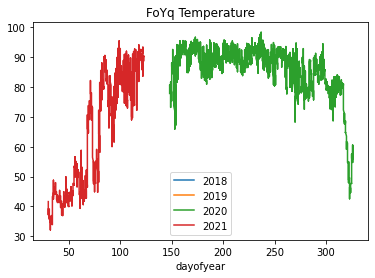

In [20]:
#FoYq has very incomplete temperature data
tmpFoYq = hive_dfs["FoYq"].set_index('dayofyear')
tmpFoYq.groupby('year')['temperature'].plot(legend = True, title = "FoYq Temperature")

year
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: humidity, dtype: object

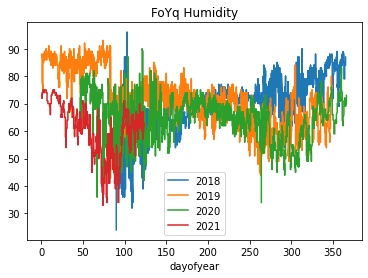

In [21]:
#But a lot more humidity data 
tmpFoYq.groupby('year')['humidity'].plot(legend = True, title = "FoYq Humidity")

In [22]:
ss_hive_dfs = {}
ss = StandardScaler()

#Create standard scaler dataframes
for hive in hive_dfs:
    hive_dfs[hive].dropna(inplace = True)
    keys = list(hive_dfs[hive].keys())
    if len(hive_dfs[hive].keys()) == 3:
        #Transform and store the three-key dataframe
        ss_hive = hive_dfs[hive][[keys[0], keys[1], keys[2]]]
        ss.fit_transform(ss_hive)
        ss_hive_dfs[hive] = ss_hive
    elif len(hive_dfs[hive].keys()) == 2:
        #ditto above for 2-key dfs
        ss_hive = hive_dfs[hive][[keys[0], keys[1]]]
        ss = StandardScaler()
        ss.fit_transform(ss_hive)
        ss_hive_dfs[hive] = ss_hive
        

In [23]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [24]:
for hive in ss_hive_dfs:
    for col in ss_hive_dfs[hive]:
        for col2 in ss_hive_dfs[hive]:
            clust_labels, cent = doKmeans(ss_hive_dfs[hive], 4)
            kmeans = pd.DataFrame(clust_labels)
            #Plot the clusters obtained using k means
            fig = plt.figure()
            ax = fig.add_subplot(111)
            scatter = ax.scatter(ss_hive_dfs[hive][col],ss_hive_dfs[hive][col2],
                                 c=kmeans[0],s=50)
            ax.set_title('K-Means Clustering: ' + hive + " " + col + " vs. " + col2)
            ax.set_xlabel(col)
            ax.set_ylabel(col2)
            plt.colorbar(scatter)